# Model validation with external data
In this notebook I will try to get the performance of the model on an external dataset I have obtained from a public repository, like ChEMBL, PubChem, Therapeutics Data Commons or MoleculeNet.

I need to find a dataset for which experimental data exactly as the one used to train my model of interest is available.

In [40]:
import sys
repo_path = '/Users/adhivp/Desktop/Ersilia_tasks' #enter your repo path here
sys.path.append(repo_path)
import pandas as pd
import numpy as np
import os
from rdkit import Chem
import matplotlib.pyplot as plt
import seaborn as sns
import tqdm

## Loading the external dataset from the largest hERG inhibitory database
- https://www.nature.com/articles/s41598-019-47536-3#Sec18
- filename - 41598_2019_47536_MOESM2_ESM.xlsx
- Has 87,367 molecules , will use random 500 positive and 1000 negative for testing (total 1500)
- After removing the common(to avoid lekage), the 1500 molecules becomes 1287 molecules , in which 360 are positive and 927 are negative
- First 2967 are positive and rest all are negative in the large data set

In [41]:
large_external_dataset_path = os.path.join(repo_path, 'data/eos30gr/41598_2019_47536_MOESM2_ESM.xlsx')
large_external_dataset = pd.read_excel(large_external_dataset_path)
large_external_dataset

,Canonical_Smiles,class
0,CCOC(=O)C1CCN(CC1)C(C)C(=O)c2c(C)[nH]c3cc(C)ccc23,1
1,Cc1nc(N)nc(SCc2ccc(cc2)[N](=O)O)c1N,1
2,COc1ccc(NC(=O)N2CCC3(CCN(C)CC3)CC2)cc1F,1
3,OC1(CN(CC1CN2CCC(CC2)N(CC=C)C(=O)OCc3ccc(cc3)C...,1
4,CCOc1ccccc1OCC(=O)Nc2cc(ccc2N3CCN(CC)CC3)S(=O)...,1
...,...,...
203848,COc1cccc(\C=N\NC(=O)C(=O)NCc2cccnc2)c1O,0
203849,CCOc1ccccc1CN2CCC(CC2)N3CCOCC3,0
203850,COc1c(CCN2CCN(CC2)C(=O)Cc3ccc(cc3)n4cnnn4)ccc5...,0
203851,Cc1onc(NC(=O)CSc2nnc(c3ccccc3)n2C)c1,0


- Taking random 1000 negative and 500 positive values from the dataset

In [42]:
# Sample 500 random values from the first 2967 indices
random_subset_1 = large_external_dataset.iloc[:2967].sample(n=500, random_state=42)

# Take the remaining 1000 values from the rest of the DataFrame
random_subset_2 = large_external_dataset.iloc[2967:].sample(n=1000, random_state=42)

# Concatenate the two subsets to create the new DataFrame
external_dataset_1500_random = pd.concat([random_subset_1, random_subset_2], ignore_index=True)
external_dataset_1500_random


,Canonical_Smiles,class
0,FC(F)(F)c1cccc(c1)c2cc(CCCN3CCOCC3)nc(n2)C#N,1
1,CCN(CC)CC#CCOC(=O)C(O)(C1CCCCC1)c2ccccc2,1
2,CCCOc1cc(cc2N(Cc3ccc(cc3)C(=O)Nc4nn[nH]n4)\C(=...,1
3,Fc1ccc(CC(=O)N2CCC(CC3CC(=NO3)c4ccc(Cl)cc4)(CC...,1
4,CCn1nc(Cc2ccc(OC(C)C)cc2)cc1C3CCN(CC4CN(CC4c5c...,1
...,...,...
1495,CCN(CC)CCN1C(C(=C(O)C1=O)C(=O)c2ccc(OC)cc2)c3o...,0
1496,CCCCCC\N=C\C1=C(O)CC(C)(C)CC1=O,0
1497,CCc1ccc(CNC(=O)C2CCCN(C2)c3nnc(C)c4c(C)n(nc34)...,0
1498,CC(C)(C)C(=O)Cn1nnc(n1)c2ccc(cc2)C(F)(F)F,0


In [43]:
# Make it Standardised smiles 
from src.smiles_processing import standardise_smiles
smiles_list = external_dataset_1500_random['Canonical_Smiles'].tolist()
standardised_smiles_list = standardise_smiles(smiles_list)
external_dataset_1500_random['Standardised_smiles'] = standardised_smiles_list

# Make inchikey
from src.convert_smiles import smiles_to_inchikey
inchikeys = []
for smiles in external_dataset_1500_random['Standardised_smiles']:
    smiles_str = str(smiles)
    
    if pd.notna(smiles_str):  
        inchikeys.append(smiles_to_inchikey(smiles_str))
    else:
        inchikeys.append(None) 
external_dataset_1500_random['Inchikey'] = inchikeys

external_dataset_1500_random

[12:31:41] Explicit valence for atom # 10 N, 4, is greater than permitted
[12:31:41] Explicit valence for atom # 10 N, 4, is greater than permitted
[12:31:41] Explicit valence for atom # 1 N, 4, is greater than permitted
[12:31:41] Explicit valence for atom # 18 N, 4, is greater than permitted
[12:31:41] Explicit valence for atom # 16 N, 4, is greater than permitted
[12:31:41] Explicit valence for atom # 1 N, 4, is greater than permitted
[12:31:41] Explicit valence for atom # 1 N, 4, is greater than permitted
[12:31:41] Explicit valence for atom # 22 N, 4, is greater than permitted
[12:31:41] Explicit valence for atom # 1 N, 4, is greater than permitted
[12:31:41] Explicit valence for atom # 10 N, 4, is greater than permitted
[12:31:41] Explicit valence for atom # 22 N, 4, is greater than permitted
[12:31:41] Explicit valence for atom # 34 N, 4, is greater than permitted
[12:31:41] Explicit valence for atom # 3 N, 4, is greater than permitted
[12:31:41] Explicit valence for atom # 29 N

,Canonical_Smiles,class,Standardised_smiles,Inchikey
0,FC(F)(F)c1cccc(c1)c2cc(CCCN3CCOCC3)nc(n2)C#N,1,N#Cc1nc(CCCN2CCOCC2)cc(-c2cccc(C(F)(F)F)c2)n1,PQTUVUOTFUHROL-UHFFFAOYSA-N
1,CCN(CC)CC#CCOC(=O)C(O)(C1CCCCC1)c2ccccc2,1,CCN(CC)CC#CCOC(=O)C(O)(c1ccccc1)C1CCCCC1,XIQVNETUBQGFHX-UHFFFAOYSA-N
2,CCCOc1cc(cc2N(Cc3ccc(cc3)C(=O)Nc4nn[nH]n4)\C(=...,1,CCCOc1cc(C(F)(F)F)cc2c1n(C)/c(=N/c1ccc(OC(F)(F...,UECFQNMLGNHNSO-JYUHDHNASA-N
3,Fc1ccc(CC(=O)N2CCC(CC3CC(=NO3)c4ccc(Cl)cc4)(CC...,1,O=C(Cc1ccc(F)cc1)N1CCC(CC2CC(c3ccc(Cl)cc3)=NO2...,JVAGCUZHLINKTQ-UHFFFAOYSA-N
4,CCn1nc(Cc2ccc(OC(C)C)cc2)cc1C3CCN(CC4CN(CC4c5c...,1,CCn1nc(Cc2ccc(OC(C)C)cc2)cc1C1CCN(CC2CN(C(C(=O...,LDTUIPCDYVXKIB-UHFFFAOYSA-N
...,...,...,...,...
1495,CCN(CC)CCN1C(C(=C(O)C1=O)C(=O)c2ccc(OC)cc2)c3o...,0,CCN(CC)CCN1C(=O)C(=O)C(C(=O)c2ccc(OC)cc2)C1c1c...,IQKYZMMAQTZSMG-UHFFFAOYSA-N
1496,CCCCCC\N=C\C1=C(O)CC(C)(C)CC1=O,0,CCCCCC/N=C/C1C(=O)CC(C)(C)CC1=O,OTPVNCPIXYAUPQ-LFIBNONCSA-N
1497,CCc1ccc(CNC(=O)C2CCCN(C2)c3nnc(C)c4c(C)n(nc34)...,0,CCc1ccc(CNC(=O)C2CCCN(c3nnc(C)c4c(C)n(-c5ccccc...,TYWZYNYHEVTCJH-UHFFFAOYSA-N
1498,CC(C)(C)C(=O)Cn1nnc(n1)c2ccc(cc2)C(F)(F)F,0,CC(C)(C)C(=O)Cn1nnc(-c2ccc(C(F)(F)F)cc2)n1,YWRSPSAXTBGPHL-UHFFFAOYSA-N


In [44]:
# drop Canonical_Smiles
external_dataset_1500_random.drop(columns=['Canonical_Smiles'],inplace=True)
external_dataset_1500_random


,class,Standardised_smiles,Inchikey
0,1,N#Cc1nc(CCCN2CCOCC2)cc(-c2cccc(C(F)(F)F)c2)n1,PQTUVUOTFUHROL-UHFFFAOYSA-N
1,1,CCN(CC)CC#CCOC(=O)C(O)(c1ccccc1)C1CCCCC1,XIQVNETUBQGFHX-UHFFFAOYSA-N
2,1,CCCOc1cc(C(F)(F)F)cc2c1n(C)/c(=N/c1ccc(OC(F)(F...,UECFQNMLGNHNSO-JYUHDHNASA-N
3,1,O=C(Cc1ccc(F)cc1)N1CCC(CC2CC(c3ccc(Cl)cc3)=NO2...,JVAGCUZHLINKTQ-UHFFFAOYSA-N
4,1,CCn1nc(Cc2ccc(OC(C)C)cc2)cc1C1CCN(CC2CN(C(C(=O...,LDTUIPCDYVXKIB-UHFFFAOYSA-N
...,...,...,...
1495,0,CCN(CC)CCN1C(=O)C(=O)C(C(=O)c2ccc(OC)cc2)C1c1c...,IQKYZMMAQTZSMG-UHFFFAOYSA-N
1496,0,CCCCCC/N=C/C1C(=O)CC(C)(C)CC1=O,OTPVNCPIXYAUPQ-LFIBNONCSA-N
1497,0,CCc1ccc(CNC(=O)C2CCCN(c3nnc(C)c4c(C)n(-c5ccccc...,TYWZYNYHEVTCJH-UHFFFAOYSA-N
1498,0,CC(C)(C)C(=O)Cn1nnc(-c2ccc(C(F)(F)F)cc2)n1,YWRSPSAXTBGPHL-UHFFFAOYSA-N


## Loading the training,test,validation set and cleaning it

In [45]:
# Loading the data 
train_set_path = os.path.join(repo_path, 'data/eos30gr/trainingset.csv')
test_set_path = os.path.join(repo_path, 'data/eos30gr/testset.csv')
validation_set_path = os.path.join(repo_path, 'data/eos30gr/validationset.csv')
test_set = pd.read_csv(train_set_path)
training_set = pd.read_csv(test_set_path)
validation_set = pd.read_csv(validation_set_path)

#Made a single dataset to work easily
combined_model_data = pd.concat([training_set, test_set, validation_set], ignore_index=True)
combined_model_data


,SMILES,No.,Smiles,activity10,activity20,activity40,activity60,activity80,activity100
0,O=C(c1ccncc1)N1CCC2(CCN(Cc3ccccc3OCC(F)(F)C(F)...,A1008,FC(C(COc1ccccc1CN1CCC2(CC1)CCN(CC2)C(=O)c1ccnc...,1.0,1.0,1.0,1.0,1.0,1.0
1,CNCc1ccc(C(F)(F)F)cc1Oc1ccc(Cl)cc1,A1009,CNCc1ccc(cc1Oc1ccc(cc1)Cl)C(F)(F)F,1.0,1.0,1.0,1.0,1.0,1.0
2,N#Cc1ccc2nc(C3CCC4(CC3)CN(c3ccccc3)C(=O)O4)[nH...,A101,N#Cc1ccc2c(c1)[nH]c(n2)C1CCC2(CC1)OC(=O)N(C2)c...,1.0,1.0,1.0,1.0,1.0,1.0
3,Cc1ccc2c(c1)CC(CCN(C)C)=C2C(C)c1cnccn1,A1010,c1cc(C)cc(c12)CC(CCN(C)C)=C2[C@@H](C)c3nccnc3,1.0,1.0,1.0,1.0,1.0,1.0
4,Cc1nc(C)c(-c2ccc3cc(CCN4CCCC4C)ccc3n2)s1,A1011,C1CC[C@@H](C)N1CCc(cc2)cc(c23)ccc(n3)-c4c(C)nc...,1.0,1.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...
12973,CCOc1cc2ncc(C(N)=O)c(Nc3ccc(C)cc3F)c2cc1N1CCN(...,D952,CCOc1cc2ncc(c(c2cc1N1CCN(CC1)C)Nc1ccc(cc1F)C)C...,0.0,NaN,NaN,NaN,NaN,NaN
12974,NC1=NC2(CO1)c1cc(-c3cccnc3F)ccc1Oc1c2cc(-c2ccc...,D975,NC1=N[C@@]2(CO1)c1cc(ccc1Oc1c2cc(nc1F)c1ccccc1...,0.0,NaN,NaN,NaN,NaN,NaN
12975,NC1=NC2(CO1)c1cc(-c3cccnc3F)ccc1Oc1c2cc(-c2ccc...,D977,NC1=N[C@@]2(CO1)c1cc(ccc1Oc1c2cc(nc1F)c1cccnc1...,0.0,NaN,NaN,NaN,NaN,NaN
12976,NC1=NC2(CO1)c1cc(-c3cccnc3F)ccc1Oc1c2cc(-c2ccn...,D980,NC1=N[C@@]2(CO1)c1cc(ccc1Oc1c2cc(nc1F)c1ccnc(c...,0.0,NaN,NaN,NaN,NaN,NaN


In [46]:
#Drop everything other than 'Smiles column'
combined_model_data.drop(combined_model_data.columns.difference(['Smiles']), axis=1, inplace=True)
combined_model_data

,Smiles
0,FC(C(COc1ccccc1CN1CCC2(CC1)CCN(CC2)C(=O)c1ccnc...
1,CNCc1ccc(cc1Oc1ccc(cc1)Cl)C(F)(F)F
2,N#Cc1ccc2c(c1)[nH]c(n2)C1CCC2(CC1)OC(=O)N(C2)c...
3,c1cc(C)cc(c12)CC(CCN(C)C)=C2[C@@H](C)c3nccnc3
4,C1CC[C@@H](C)N1CCc(cc2)cc(c23)ccc(n3)-c4c(C)nc...
...,...
12973,CCOc1cc2ncc(c(c2cc1N1CCN(CC1)C)Nc1ccc(cc1F)C)C...
12974,NC1=N[C@@]2(CO1)c1cc(ccc1Oc1c2cc(nc1F)c1ccccc1...
12975,NC1=N[C@@]2(CO1)c1cc(ccc1Oc1c2cc(nc1F)c1cccnc1...
12976,NC1=N[C@@]2(CO1)c1cc(ccc1Oc1c2cc(nc1F)c1ccnc(c...


In [47]:
# Make it Standardised smiles 
from src.smiles_processing import standardise_smiles
smiles_list = combined_model_data['Smiles'].tolist()
standardised_smiles_list = standardise_smiles(smiles_list)
combined_model_data['Standardised_smiles'] = standardised_smiles_list

# Make inchikey
from src.convert_smiles import smiles_to_inchikey
inchikeys = []
for smiles in combined_model_data['Standardised_smiles']:
    smiles_str = str(smiles)
    
    if pd.notna(smiles_str):  
        inchikeys.append(smiles_to_inchikey(smiles_str))
    else:
        inchikeys.append(None) 
combined_model_data['Inchikey'] = inchikeys

combined_model_data

[12:32:08] SMILES Parse Error: syntax error while parsing: nan
[12:32:08] SMILES Parse Error: Failed parsing SMILES 'nan' for input: 'nan'
[12:32:08] SMILES Parse Error: syntax error while parsing: nan
[12:32:08] SMILES Parse Error: Failed parsing SMILES 'nan' for input: 'nan'
[12:32:08] SMILES Parse Error: syntax error while parsing: nan
[12:32:08] SMILES Parse Error: Failed parsing SMILES 'nan' for input: 'nan'
[12:32:09] SMILES Parse Error: syntax error while parsing: nan
[12:32:09] SMILES Parse Error: Failed parsing SMILES 'nan' for input: 'nan'
[12:32:09] SMILES Parse Error: syntax error while parsing: nan
[12:32:09] SMILES Parse Error: Failed parsing SMILES 'nan' for input: 'nan'
[12:32:09] SMILES Parse Error: syntax error while parsing: nan
[12:32:09] SMILES Parse Error: Failed parsing SMILES 'nan' for input: 'nan'
[12:32:09] SMILES Parse Error: syntax error while parsing: nan
[12:32:09] SMILES Parse Error: Failed parsing SMILES 'nan' for input: 'nan'
[12:32:09] SMILES Parse Err

,Smiles,Standardised_smiles,Inchikey
0,FC(C(COc1ccccc1CN1CCC2(CC1)CCN(CC2)C(=O)c1ccnc...,O=C(c1ccncc1)N1CCC2(CCN(Cc3ccccc3OCC(F)(F)C(F)...,ZADAAHRYTRXWRE-UHFFFAOYSA-N
1,CNCc1ccc(cc1Oc1ccc(cc1)Cl)C(F)(F)F,CNCc1ccc(C(F)(F)F)cc1Oc1ccc(Cl)cc1,OJLXPNXGJXIUAY-UHFFFAOYSA-N
2,N#Cc1ccc2c(c1)[nH]c(n2)C1CCC2(CC1)OC(=O)N(C2)c...,N#Cc1ccc2nc(C3CCC4(CC3)CN(c3ccccc3)C(=O)O4)[nH...,VJDPCRVAZYFIDE-UHFFFAOYSA-N
3,c1cc(C)cc(c12)CC(CCN(C)C)=C2[C@@H](C)c3nccnc3,Cc1ccc2c(c1)CC(CCN(C)C)=C2[C@@H](C)c1cnccn1,OWMBYQVIMDTSAW-HNNXBMFYSA-N
4,C1CC[C@@H](C)N1CCc(cc2)cc(c23)ccc(n3)-c4c(C)nc...,Cc1nc(C)c(-c2ccc3cc(CCN4CCC[C@H]4C)ccc3n2)s1,BQISWHWVPNTPCD-CQSZACIVSA-N
...,...,...,...
12973,CCOc1cc2ncc(c(c2cc1N1CCN(CC1)C)Nc1ccc(cc1F)C)C...,CCOc1cc2ncc(C(N)=O)c(Nc3ccc(C)cc3F)c2cc1N1CCN(...,BBUGAAUSTUTTDJ-UHFFFAOYSA-N
12974,NC1=N[C@@]2(CO1)c1cc(ccc1Oc1c2cc(nc1F)c1ccccc1...,NC1=N[C@@]2(CO1)c1cc(-c3cccnc3F)ccc1Oc1c2cc(-c...,OKKAKGFUYCJYOI-VWLOTQADSA-N
12975,NC1=N[C@@]2(CO1)c1cc(ccc1Oc1c2cc(nc1F)c1cccnc1...,NC1=N[C@@]2(CO1)c1cc(-c3cccnc3F)ccc1Oc1c2cc(-c...,RBPRSPHHAIPMOL-DEOSSOPVSA-N
12976,NC1=N[C@@]2(CO1)c1cc(ccc1Oc1c2cc(nc1F)c1ccnc(c...,NC1=N[C@@]2(CO1)c1cc(-c3cccnc3F)ccc1Oc1c2cc(-c...,PJZKRIUYQAGJRH-DEOSSOPVSA-N


In [48]:
#Dropping Smiles
combined_model_data.drop(columns=['Smiles'],inplace=True)
combined_model_data

,Standardised_smiles,Inchikey
0,O=C(c1ccncc1)N1CCC2(CCN(Cc3ccccc3OCC(F)(F)C(F)...,ZADAAHRYTRXWRE-UHFFFAOYSA-N
1,CNCc1ccc(C(F)(F)F)cc1Oc1ccc(Cl)cc1,OJLXPNXGJXIUAY-UHFFFAOYSA-N
2,N#Cc1ccc2nc(C3CCC4(CC3)CN(c3ccccc3)C(=O)O4)[nH...,VJDPCRVAZYFIDE-UHFFFAOYSA-N
3,Cc1ccc2c(c1)CC(CCN(C)C)=C2[C@@H](C)c1cnccn1,OWMBYQVIMDTSAW-HNNXBMFYSA-N
4,Cc1nc(C)c(-c2ccc3cc(CCN4CCC[C@H]4C)ccc3n2)s1,BQISWHWVPNTPCD-CQSZACIVSA-N
...,...,...
12973,CCOc1cc2ncc(C(N)=O)c(Nc3ccc(C)cc3F)c2cc1N1CCN(...,BBUGAAUSTUTTDJ-UHFFFAOYSA-N
12974,NC1=N[C@@]2(CO1)c1cc(-c3cccnc3F)ccc1Oc1c2cc(-c...,OKKAKGFUYCJYOI-VWLOTQADSA-N
12975,NC1=N[C@@]2(CO1)c1cc(-c3cccnc3F)ccc1Oc1c2cc(-c...,RBPRSPHHAIPMOL-DEOSSOPVSA-N
12976,NC1=N[C@@]2(CO1)c1cc(-c3cccnc3F)ccc1Oc1c2cc(-c...,PJZKRIUYQAGJRH-DEOSSOPVSA-N


In [49]:
# Dropping duplicates using Inchikey
combined_model_data.drop_duplicates(subset=['Inchikey'],inplace=True)
combined_model_data


,Standardised_smiles,Inchikey
0,O=C(c1ccncc1)N1CCC2(CCN(Cc3ccccc3OCC(F)(F)C(F)...,ZADAAHRYTRXWRE-UHFFFAOYSA-N
1,CNCc1ccc(C(F)(F)F)cc1Oc1ccc(Cl)cc1,OJLXPNXGJXIUAY-UHFFFAOYSA-N
2,N#Cc1ccc2nc(C3CCC4(CC3)CN(c3ccccc3)C(=O)O4)[nH...,VJDPCRVAZYFIDE-UHFFFAOYSA-N
3,Cc1ccc2c(c1)CC(CCN(C)C)=C2[C@@H](C)c1cnccn1,OWMBYQVIMDTSAW-HNNXBMFYSA-N
4,Cc1nc(C)c(-c2ccc3cc(CCN4CCC[C@H]4C)ccc3n2)s1,BQISWHWVPNTPCD-CQSZACIVSA-N
...,...,...
12973,CCOc1cc2ncc(C(N)=O)c(Nc3ccc(C)cc3F)c2cc1N1CCN(...,BBUGAAUSTUTTDJ-UHFFFAOYSA-N
12974,NC1=N[C@@]2(CO1)c1cc(-c3cccnc3F)ccc1Oc1c2cc(-c...,OKKAKGFUYCJYOI-VWLOTQADSA-N
12975,NC1=N[C@@]2(CO1)c1cc(-c3cccnc3F)ccc1Oc1c2cc(-c...,RBPRSPHHAIPMOL-DEOSSOPVSA-N
12976,NC1=N[C@@]2(CO1)c1cc(-c3cccnc3F)ccc1Oc1c2cc(-c...,PJZKRIUYQAGJRH-DEOSSOPVSA-N


## Ensuring there is no common data between model all datas and external data

In [50]:
#Dropping the duplicates in external dataset_1500_random
#Dropping the common Inchikeys
external_dataset_1500_random.drop_duplicates(subset=['Inchikey'], keep='first', inplace=True)

inchikeys_combined = set(combined_model_data['Inchikey'])
inchikeys_external = set(external_dataset_1500_random['Inchikey'])

common_inchikeys = inchikeys_combined.intersection(inchikeys_external)

common_indexes = external_dataset_1500_random[external_dataset_1500_random['Inchikey'].isin(common_inchikeys)].index

external_dataset_1500_random.drop(index=common_indexes, inplace=True)

print("Number of common Inchikeys:", len(common_inchikeys))
print("Number of rows removed from external_dataset_1500_random:", len(common_indexes))


Number of common Inchikeys: 114
Number of rows removed from external_dataset_1500_random: 114


In [51]:
external_dataset_1500_random

,class,Standardised_smiles,Inchikey
1,1,CCN(CC)CC#CCOC(=O)C(O)(c1ccccc1)C1CCCCC1,XIQVNETUBQGFHX-UHFFFAOYSA-N
2,1,CCCOc1cc(C(F)(F)F)cc2c1n(C)/c(=N/c1ccc(OC(F)(F...,UECFQNMLGNHNSO-JYUHDHNASA-N
3,1,O=C(Cc1ccc(F)cc1)N1CCC(CC2CC(c3ccc(Cl)cc3)=NO2...,JVAGCUZHLINKTQ-UHFFFAOYSA-N
4,1,CCn1nc(Cc2ccc(OC(C)C)cc2)cc1C1CCN(CC2CN(C(C(=O...,LDTUIPCDYVXKIB-UHFFFAOYSA-N
5,1,Cc1cccc(N2CCN(CC(O)COCc3cccs3)CC2)c1C,KHNCPWUJSRUVHU-UHFFFAOYSA-N
...,...,...,...
1495,0,CCN(CC)CCN1C(=O)C(=O)C(C(=O)c2ccc(OC)cc2)C1c1c...,IQKYZMMAQTZSMG-UHFFFAOYSA-N
1496,0,CCCCCC/N=C/C1C(=O)CC(C)(C)CC1=O,OTPVNCPIXYAUPQ-LFIBNONCSA-N
1497,0,CCc1ccc(CNC(=O)C2CCCN(c3nnc(C)c4c(C)n(-c5ccccc...,TYWZYNYHEVTCJH-UHFFFAOYSA-N
1498,0,CC(C)(C)C(=O)Cn1nnc(-c2ccc(C(F)(F)F)cc2)n1,YWRSPSAXTBGPHL-UHFFFAOYSA-N


In [52]:
class_sum = external_dataset_1500_random['class'].sum()
num_rows = len(external_dataset_1500_random)
result = num_rows - class_sum
print("Postive:",class_sum)
print("Negative:", result)


Postive: 360
Negative: 927


- After processing there are 1287 molecules
- In 1287 , 360 are positive and 927 are negative

In [53]:
external_dataset_1500_random.reset_index(drop=True, inplace=True)
external_dataset_1287_random = external_dataset_1500_random
external_dataset_1287_random

,class,Standardised_smiles,Inchikey
0,1,CCN(CC)CC#CCOC(=O)C(O)(c1ccccc1)C1CCCCC1,XIQVNETUBQGFHX-UHFFFAOYSA-N
1,1,CCCOc1cc(C(F)(F)F)cc2c1n(C)/c(=N/c1ccc(OC(F)(F...,UECFQNMLGNHNSO-JYUHDHNASA-N
2,1,O=C(Cc1ccc(F)cc1)N1CCC(CC2CC(c3ccc(Cl)cc3)=NO2...,JVAGCUZHLINKTQ-UHFFFAOYSA-N
3,1,CCn1nc(Cc2ccc(OC(C)C)cc2)cc1C1CCN(CC2CN(C(C(=O...,LDTUIPCDYVXKIB-UHFFFAOYSA-N
4,1,Cc1cccc(N2CCN(CC(O)COCc3cccs3)CC2)c1C,KHNCPWUJSRUVHU-UHFFFAOYSA-N
...,...,...,...
1282,0,CCN(CC)CCN1C(=O)C(=O)C(C(=O)c2ccc(OC)cc2)C1c1c...,IQKYZMMAQTZSMG-UHFFFAOYSA-N
1283,0,CCCCCC/N=C/C1C(=O)CC(C)(C)CC1=O,OTPVNCPIXYAUPQ-LFIBNONCSA-N
1284,0,CCc1ccc(CNC(=O)C2CCCN(c3nnc(C)c4c(C)n(-c5ccccc...,TYWZYNYHEVTCJH-UHFFFAOYSA-N
1285,0,CC(C)(C)C(=O)Cn1nnc(-c2ccc(C(F)(F)F)cc2)n1,YWRSPSAXTBGPHL-UHFFFAOYSA-N


In [54]:
# File saved for giving input for model
file_path = repo_path +'/data/eos30gr/external_dataset_1287_random.csv'
external_dataset_1287_random.to_csv(file_path, index=False)

## Working with the eos30gr output data and providing Model Metrics

In [55]:
#import the data after processing
external_data_1287_random_eos30gr_output_path = repo_path +'/data/eos30gr/external_data_1287_random_eos30gr_output.csv'
external_data_1287_random_eos30gr_output = pd.read_csv(external_data_1287_random_eos30gr_output_path)
external_data_1287_random_eos30gr_output

,key,input,activity10
0,XIQVNETUBQGFHX-UHFFFAOYSA-N,CCN(CC)CC#CCOC(=O)C(O)(c1ccccc1)C1CCCCC1,0.126450
1,UECFQNMLGNHNSO-JYUHDHNASA-N,CCCOc1cc(C(F)(F)F)cc2c1n(C)/c(=N/c1ccc(OC(F)(F...,0.488449
2,JVAGCUZHLINKTQ-UHFFFAOYSA-N,O=C(Cc1ccc(F)cc1)N1CCC(CC2CC(c3ccc(Cl)cc3)=NO2...,0.594059
3,LDTUIPCDYVXKIB-UHFFFAOYSA-N,CCn1nc(Cc2ccc(OC(C)C)cc2)cc1C1CCN(CC2CN(C(C(=O...,0.980198
4,KHNCPWUJSRUVHU-UHFFFAOYSA-N,Cc1cccc(N2CCN(CC(O)COCc3cccs3)CC2)c1C,0.565594
...,...,...,...
1282,IQKYZMMAQTZSMG-UHFFFAOYSA-N,CCN(CC)CCN1C(=O)C(=O)C(C(=O)c2ccc(OC)cc2)C1c1c...,0.505693
1283,OTPVNCPIXYAUPQ-LFIBNONCSA-N,CCCCCC/N=C/C1C(=O)CC(C)(C)CC1=O,0.430693
1284,TYWZYNYHEVTCJH-UHFFFAOYSA-N,CCc1ccc(CNC(=O)C2CCCN(c3nnc(C)c4c(C)n(-c5ccccc...,0.639439
1285,YWRSPSAXTBGPHL-UHFFFAOYSA-N,CC(C)(C)C(=O)Cn1nnc(-c2ccc(C(F)(F)F)cc2)n1,0.319307


In [56]:
# Marking the treshold above 0.5 as positive
def map_to_label(prediction):
    if prediction > 0.5:
        return 1
    else:
        return 0
external_data_1287_random_eos30gr_output['predictions_label_0.5'] = external_data_1287_random_eos30gr_output['activity10'].apply(lambda x: map_to_label(x))
external_data_1287_random_eos30gr_output

,key,input,activity10,predictions_label_0.5
0,XIQVNETUBQGFHX-UHFFFAOYSA-N,CCN(CC)CC#CCOC(=O)C(O)(c1ccccc1)C1CCCCC1,0.126450,0
1,UECFQNMLGNHNSO-JYUHDHNASA-N,CCCOc1cc(C(F)(F)F)cc2c1n(C)/c(=N/c1ccc(OC(F)(F...,0.488449,0
2,JVAGCUZHLINKTQ-UHFFFAOYSA-N,O=C(Cc1ccc(F)cc1)N1CCC(CC2CC(c3ccc(Cl)cc3)=NO2...,0.594059,1
3,LDTUIPCDYVXKIB-UHFFFAOYSA-N,CCn1nc(Cc2ccc(OC(C)C)cc2)cc1C1CCN(CC2CN(C(C(=O...,0.980198,1
4,KHNCPWUJSRUVHU-UHFFFAOYSA-N,Cc1cccc(N2CCN(CC(O)COCc3cccs3)CC2)c1C,0.565594,1
...,...,...,...,...
1282,IQKYZMMAQTZSMG-UHFFFAOYSA-N,CCN(CC)CCN1C(=O)C(=O)C(C(=O)c2ccc(OC)cc2)C1c1c...,0.505693,1
1283,OTPVNCPIXYAUPQ-LFIBNONCSA-N,CCCCCC/N=C/C1C(=O)CC(C)(C)CC1=O,0.430693,0
1284,TYWZYNYHEVTCJH-UHFFFAOYSA-N,CCc1ccc(CNC(=O)C2CCCN(c3nnc(C)c4c(C)n(-c5ccccc...,0.639439,1
1285,YWRSPSAXTBGPHL-UHFFFAOYSA-N,CC(C)(C)C(=O)Cn1nnc(-c2ccc(C(F)(F)F)cc2)n1,0.319307,0


In [57]:
from sklearn.metrics import confusion_matrix

real_labels = external_dataset_1287_random['class']
predicted_labels = external_data_1287_random_eos30gr_output['predictions_label_0.5']

cm = confusion_matrix(real_labels, predicted_labels)

print("Confusion Matrix:")
print(cm)


Confusion Matrix:
[[731 196]
 [127 233]]


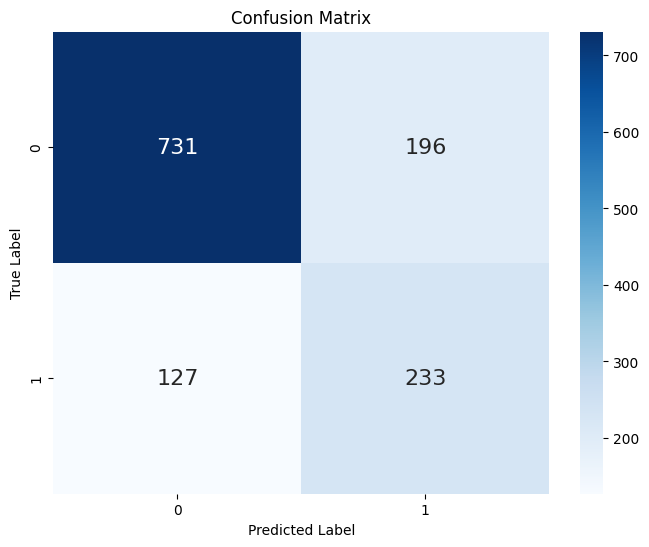

In [58]:
import seaborn as sns
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", annot_kws={"size": 16})
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

Accuracy: (TP + TN) / (TP + TN + FP + FN)

Sensitivity (Recall): TP / (TP + FN)

Specificity: TN / (TN + FP)

Precision: TP / (TP + FP)

Negative Predictive Value: TN / (TN + FN)

Balanced Accuracy: (Sensitivity + Specificity) / 2

Matthew's Correlation Coefficient: (TP * TN - FP * FN) / sqrt((TP + FP)(TP + FN)(TN + FP)(TN + FN))

F1 Score: 2 * Precision * Recall / (Precision + Recall)


In [59]:
TP = cm[1, 1]
TN = cm[0, 0]
FP = cm[0, 1]
FN = cm[1, 0]

accuracy = (TP + TN) / (TP + TN + FP + FN)
precision = TP / (TP + FP)
recall = sensitivity = TP / (TP + FN)
specificity = TN / (TN + FP)
negative_predictive_value = TN / (TN + FN)
balanced_accuracy = (sensitivity + specificity) / 2
mcc = (TP * TN - FP * FN) / ((TP + FP) * (TP + FN) * (TN + FP) * (TN + FN)) ** 0.5
f1_score = 2 * precision * recall / (precision + recall)

metrics_dict = {
    "Accuracy": accuracy,
    "Sensitivity": sensitivity,
    "Specificity": specificity,
    "Precision / Positive Predictive Value": precision,
    "Recall": recall,
    "Negative Predictive Value": negative_predictive_value,
    "Balanced Accuracy": balanced_accuracy,
    "Matthew's Correlation Coefficient": mcc,
    "F1 Score": f1_score,
}

metrics_df = pd.DataFrame.from_dict(metrics_dict, orient='index', columns=['Value'])

print("Evaluation Metrics:")
metrics_df


Evaluation Metrics:


,Value
Accuracy,0.749029
Sensitivity,0.647222
Specificity,0.788565
Precision / Positive Predictive Value,0.543124
Recall,0.647222
Negative Predictive Value,0.851981
Balanced Accuracy,0.717894
Matthew's Correlation Coefficient,0.414948
F1 Score,0.590621


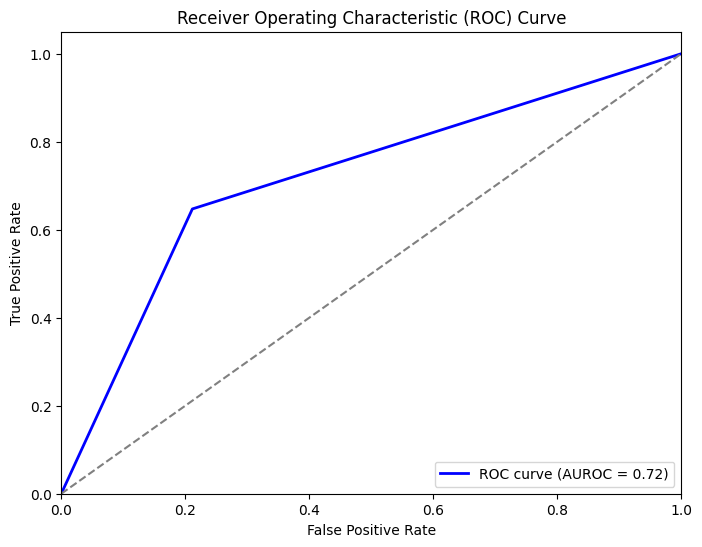

AUROC: 0.717893743257821
R2 value: -0.24565803667745434


In [60]:
# printing AUROC and R2 values

import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc , r2_score
fpr, tpr ,thresholds = roc_curve(external_dataset_1287_random['class'],external_data_1287_random_eos30gr_output['predictions_label_0.5'])

auroc = auc(fpr, tpr)
r2 = r2_score(external_dataset_1287_random['class'],external_data_1287_random_eos30gr_output['predictions_label_0.5'])
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUROC = %0.2f)' % auroc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()
print("AUROC:", auroc)
print ("R2 value:",r2)



## Conclusion


1. **Accuracy:**  
   - The accuracy of the model is 74.90%, indicating that it correctly predicts the class labels for nearly three-quarters of the observations.

2. **Sensitivity (True Positive Rate):**
   - The sensitivity of the model is 64.72%, indicating that it correctly identifies 64.72% of the actual positive cases.

3. **Specificity (True Negative Rate):**
   - The specificity of the model is 78.86%, indicating that it correctly identifies 78.86% of the actual negative cases.

4. **Precision (Positive Predictive Value):**
   - The precision of the model is 54.31%, indicating that when it predicts a positive case, it is correct 54.31% of the time.

5. **Recall (Same as Sensitivity):**
   - The recall of the model is 64.72%, indicating the same as sensitivity.

6. **Negative Predictive Value:**
   - The negative predictive value of the model is 85.20%, indicating that when it predicts a negative case, it is correct 85.20% of the time.

7. **Balanced Accuracy:**
   - The balanced accuracy of the model is 71.79%, which is the average of sensitivity and specificity, providing a balanced view of the model's performance.

8. **Matthew's Correlation Coefficient:**
   - The Matthew's correlation coefficient of the model is 0.41, indicating a moderate level of correlation between the predicted and true binary classifications.

9. **F1 Score:**
   - The F1 score of the model is 59.06%, which is the harmonic mean of precision and recall, providing a balance between the two metrics.

10. **AUROC (Area Under the Receiver Operating Characteristic Curve):**
    - The AUROC of the model is 71.79%, indicating the model's ability to distinguish between the positive and negative classes across various threshold values.

11. **R2 Value:**
    - The R-squared value of the model is -0.25, which is negative, indicating that the model performs worse than a horizontal line (a horizontal line would have an R2 value of 0), suggesting that the model does not fit the data well in the context of regression analysis.
